### Linear regression

### Advertisement data

### Short EDA on ads data

In [ ]:
# read in the data into pandas dataframe

import pandas as pd
import numpy as np

df = pd.read_csv("advertising.csv", index_col=0)

df.head()

# and start doing some EDA

print(f"{df.shape[0]} samples")
print(f"{df.shape[1]-1} features") # subtract one as price_unit_area is the label and not    

df

-features/independent variable: TV, radio, newspaper

-label/target/dependent variable: sales

In [ ]:
df.info()

In [ ]:
# 200 rows/samples
# 4 column: 3 features and 1 label


df.shape

In [ ]:
import seaborn as sns
# 1 example plot

sns.scatterplot(data = df, x="TV", y="Sales")

NameError: name 'sns' is not defined

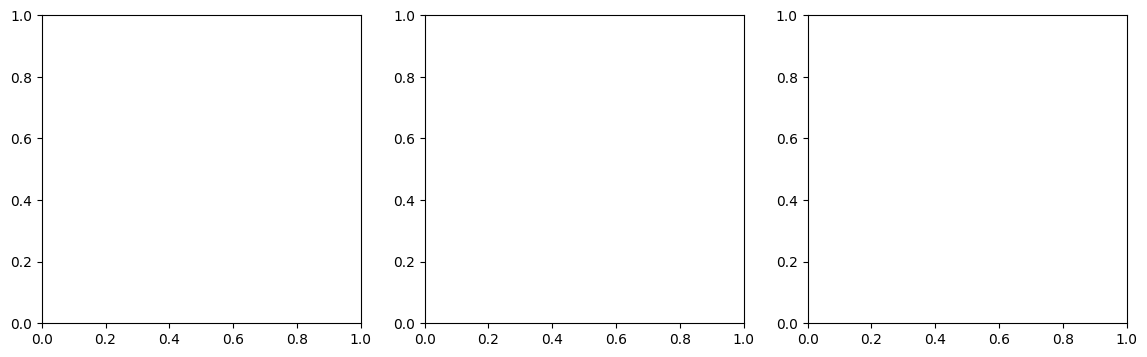

In [1]:
import matplotlib.pyplot as plt

#want to plot TV, radio, news vs sales on the 3 axes


fig, axes = plt.subplots(1,3, figsize=(14,4))
sns.scatterplot(data = df, x = "TV", y="Sales", ax = axes[0])
sns.scatterplot(data = df, x = "Radio", y="Sales", ax = axes[1])
sns.scatterplot(data = df, x = "Newspaper", y="Sales", ax = axes[2])

axes[0].set(title = "TV spending vs sales")

#and so on

same as above, but put into loop to keep it more DRY 

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(14,4))

features = ("TV","Radio", "Newspaper")
for feature, ax in zip(features, axes.flatten()):
    sns.scatterplot(data = df, x = feature, y="Sales", ax = ax)  
    ax.set(title=f"{feature} vs sales")

## Scikit-learn steps

See this as a recipe to follow, works for most machine learning algorithms with some modifications

steps:

0. divide into feature matrix X and label y
1. train|test split
2. scale dataset ( some algorithms don´t need scaling)
3. fit algorithm with training data
4. transform training data and test data
5. evealuate on test data


### 0. Divide into features X and labe y

In [ ]:
y = df["Sales"]
y

In [ ]:
# df[["TV", "Newspaper""Radio"]]
X = df.drop("Sales", axis=1)
X.head()

common way that i will do the above with tuple unpacking

In [ ]:
X, y=  df.drop("Sales", axis=1), df["Sales"]

X.head(3)

In [ ]:
y.head(3)

### 1. Train|test split

- possible to do manually, but sklearn has this implemented of off the shelf that we can use

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")


In [ ]:
X_train.head()

In [ ]:
y_test.head()

### 2. scale dataset

common scaling techniques
- min-max also called normalization
- feature standardization

many algorithms work better or only works when the features as scaled
- values "closer" to each other

for normalization
-  $X' = \frac{X-X_{min}}{X_{max}-X_{min}}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a MinMaxScaler instance
scaler = MinMaxScaler()

# important note: fit on X-train and not X_test -> this avoids data leakage
scaler.fit(X_train) # use training data to fit the scaler

# transforms or scales X_train and X_test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape


In [ ]:
scaled_X_train.min(), scaled_X_train.max()

In [ ]:
# we have used parameters X_min abd X_max from X_train to scale X_test
# if you get exactly 0 and 1 here then probably you have fit X_test which would leak data
scaled_X_test.min(), scaled_X_test.max()

### 3. Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# put in training data features and label
model.fit(scaled_X_train, y_train)

model.intercept_, model.coef_


test manual prediction

In [53]:
# TV, radio, news but scaled
test_sample_feature = scaled_X_test[0]

test_sample_feature

array([0.54988164, 0.63709677, 0.52286282])

In [56]:
w = model.coef_
w0 = model.intercept_

print("prediction on the test sample")
w0 + w[0]*test_sample_feature[0] + w[1]*test_sample_feature[1] +  w[2]*test_sample_feature[2]

prediction on the test sample


np.float64(16.586730852231778)

In [57]:
print("label for our test sample")
y_test.iloc[0]

label for our test sample


np.float64(16.9)

###  4. Predict on test data

In [58]:
y_pred = model.predict(scaled_X_test)
y_pred

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

### Evaluate performance

How well did we predict $\bf{y}$ (label) with $\hat{\bf{y}}$ (y_pred)?

To answer this question we use several **evaluation metrics** or **loss functions**: 

- Mean Absolute Error (MAE) - mean of error between $\bf{y}$ and ${\hat{\bf{y}}}$. The unit is same as measured quantity.

$$MAE = \frac{1}{m}\sum_{i=1}^m |y_i - \hat{y}_i|$$

- Mean Squared Error (MSE) - mean of squared errors between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are in square units of the measured quantity

$$MSE = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2$$

- Root Mean Squared Error (RMSE) - square root of MSE between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are same as measured quantity, hence easier to interpret.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2}$$


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse

(1.4937750024728977, 3.72792833068152, np.float64(1.9307843822347228))

take the evalutation metrics and compare it to other models

ex
- linear regression gave us RMSE = 1.93
- random forest gave us RMSE = 1.75

-> choose random forest

## Below is not class notes

In [ ]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.head(2), y.head(2)

In [ ]:
y.head()

Train|test split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Feature scaling

In [ ]:
# we use normalization here
# instantiate an object from the class MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # use the training data to fit the scaler

# very important that we fit to training data, i.e. use training datas parameters to transform 
# both training and test data, else if we use test datas parameters to scale test data, we have 
# leaked data, which might give misleading results 
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}") # natural that it isn't [0,1] since we fit to training data 

# we do not scale our target variable y in this lecture 

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

# this model uses SVD approach for solving normal equation
model = LinearRegression()
model.fit(scaled_X_train, y_train)
print(f"Parameters: {model.coef_}")
print(f"Intercept parameter: {model.intercept_}")

Predict on test data

In [ ]:
# first predict on our test data
y_pred = model.predict(scaled_X_test)

Evaluate performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")